In [3]:
import pandas as pd

# Leer los archivos CSV
vehicles_df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')
models_df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//modelos.csv')

# Mostrar las primeras filas de ambos DataFrames para entender su estructura
vehicles_df.head(), models_df.head()

(   price    year manufacturer                  model fuel  odometer  \
 0  22590  2010.0    chevrolet         silverado 1500  gas   71229.0   
 1  30990  2017.0       toyota   tundra double cab sr  gas   41124.0   
 2  15000  2013.0         ford               f150 xlt  gas  128000.0   
 3  35000  2019.0       toyota                 tacoma  gas   43000.0   
 4  29990  2016.0    chevrolet  colorado extended cab  gas   17302.0   
 
   transmission drive       size    type state      lat       long  
 0        other   4wd  full-size  pickup    al  32.5900 -85.480000  
 1        other   4wd  full-size  pickup    al  32.5900 -85.480000  
 2    automatic   rwd  full-size   truck    al  32.5920 -85.518900  
 3    automatic   4wd   mid-size   truck    al  32.6013 -85.443974  
 4        other   4wd   mid-size  pickup    al  32.5900 -85.480000  ,
   manufacturer model
 0        acura   ilx
 1        acura   mdx
 2        acura   rdx
 3        acura    rl
 4        acura   rlx)

In [4]:
# Agrupar por modelo y calcular el precio promedio y el número de registros para cada modelo
model_stats = vehicles_df.groupby('model').agg(
    avg_price=('price', 'mean'),
    count=('price', 'size')
).reset_index()

# Unir con el DataFrame de modelos para obtener los nombres de los fabricantes
model_stats = models_df.merge(model_stats, on='model')

# Mostrar la tabla resultante
model_stats.head()


manufacturer model     avg_price  count
0        acura   ilx  14988.063830     94
1        acura   mdx  14555.516330    643
2        acura   rdx  16260.982906    234
3        acura    rl   6092.790323     62
4        acura   rlx  16609.625000     16

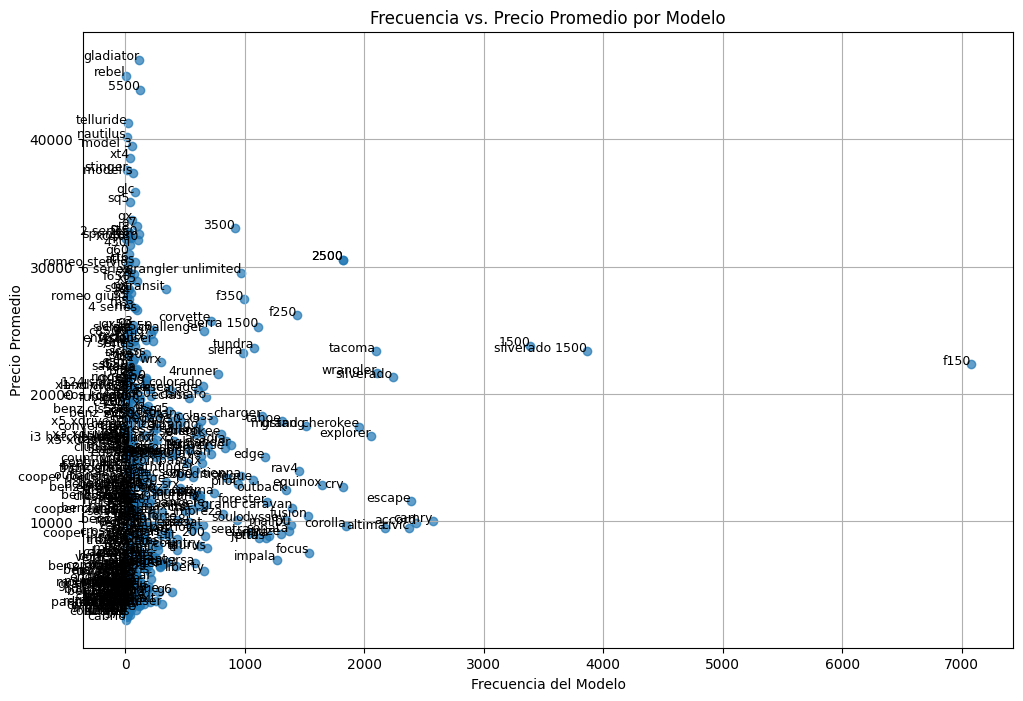

In [5]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 8))
plt.scatter(model_stats['count'], model_stats['avg_price'], alpha=0.7)

# Añadir etiquetas a los puntos
for i, model in enumerate(model_stats['model']):
    plt.text(model_stats['count'][i], model_stats['avg_price'][i], model, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Frecuencia vs. Precio Promedio por Modelo')
plt.xlabel('Frecuencia del Modelo')
plt.ylabel('Precio Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [11]:
# Crear un mapa de colores para los fabricantes
manufacturers = vehicles_df['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 10))
for manufacturer in manufacturers:
    subset = model_stats[model_stats['manufacturer'] == manufacturer]
    plt.scatter(
        subset['count'], subset['avg_price'], 
        s=subset['count']*2, alpha=0.6, 
        label=manufacturer, color=manufacturer_colors[manufacturer]
    )

# Añadir etiquetas a los puntos
for i, model in enumerate(model_stats['model']):
    plt.text(model_stats['count'][i], model_stats['avg_price'][i], model, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Frecuencia vs. Precio Promedio por Modelo (Colores por Fabricante)')
plt.xlabel('Frecuencia del Modelo')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\4031624684.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\2587074695.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


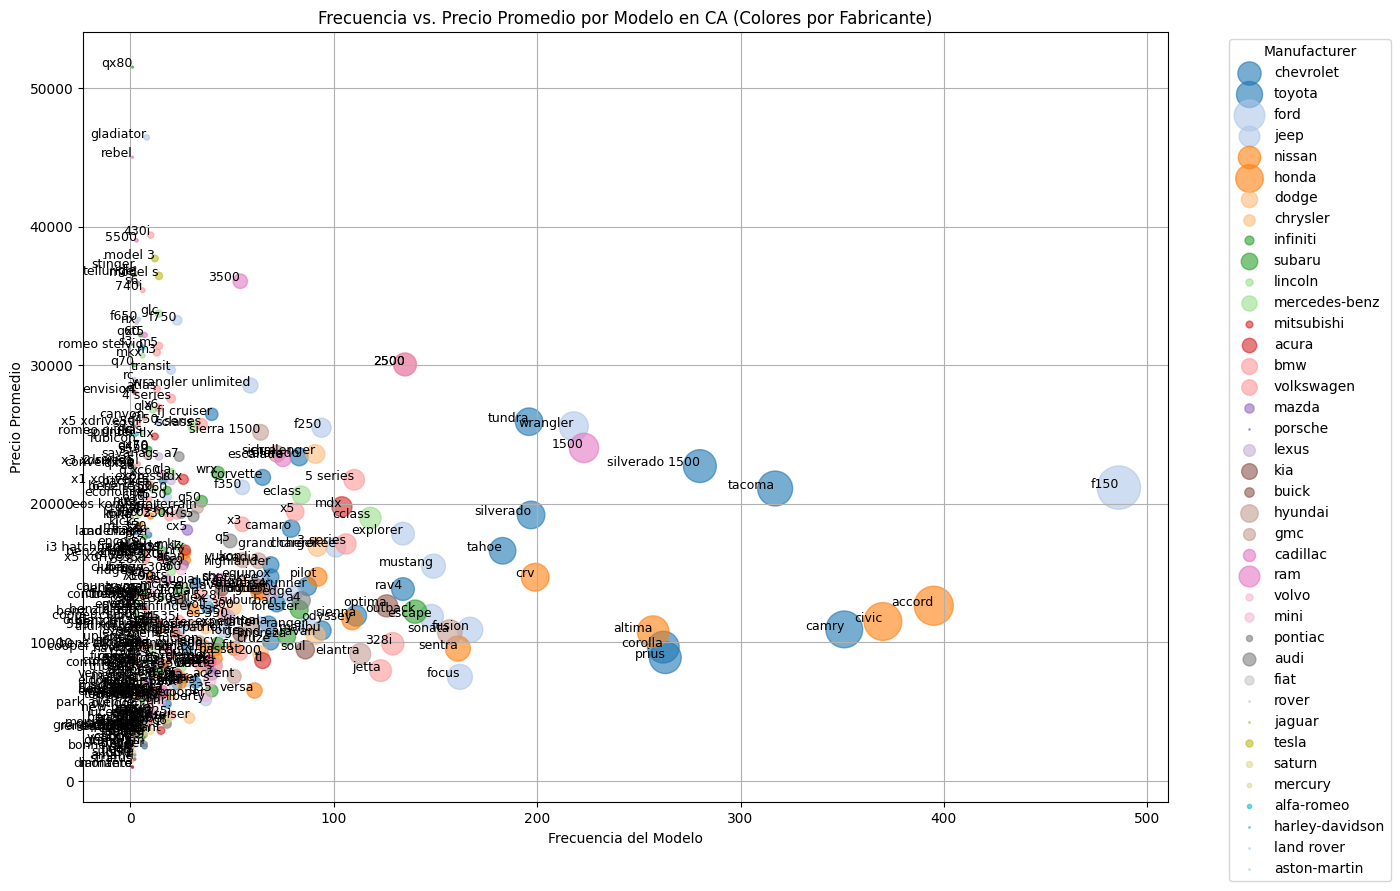

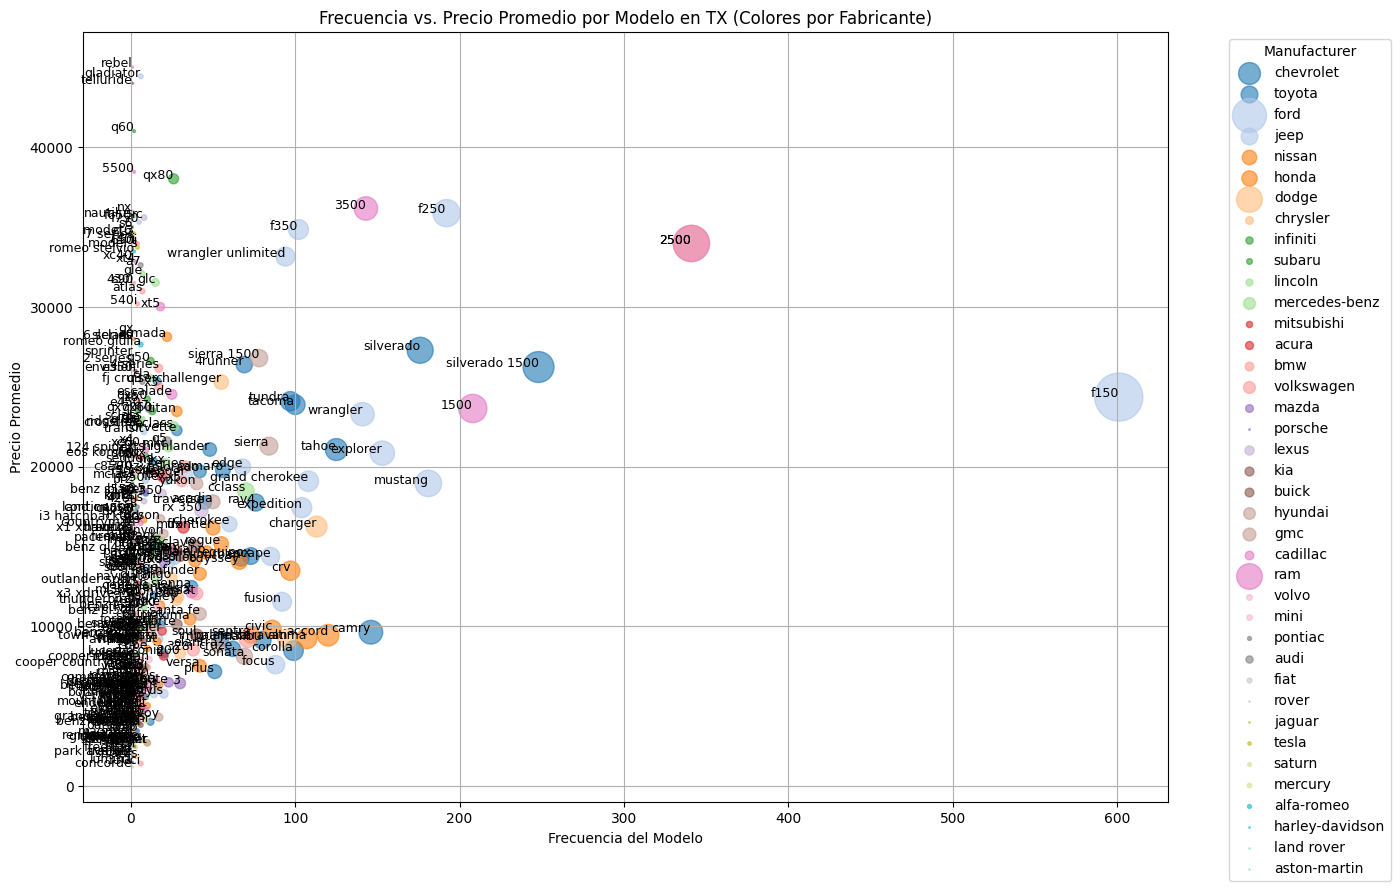

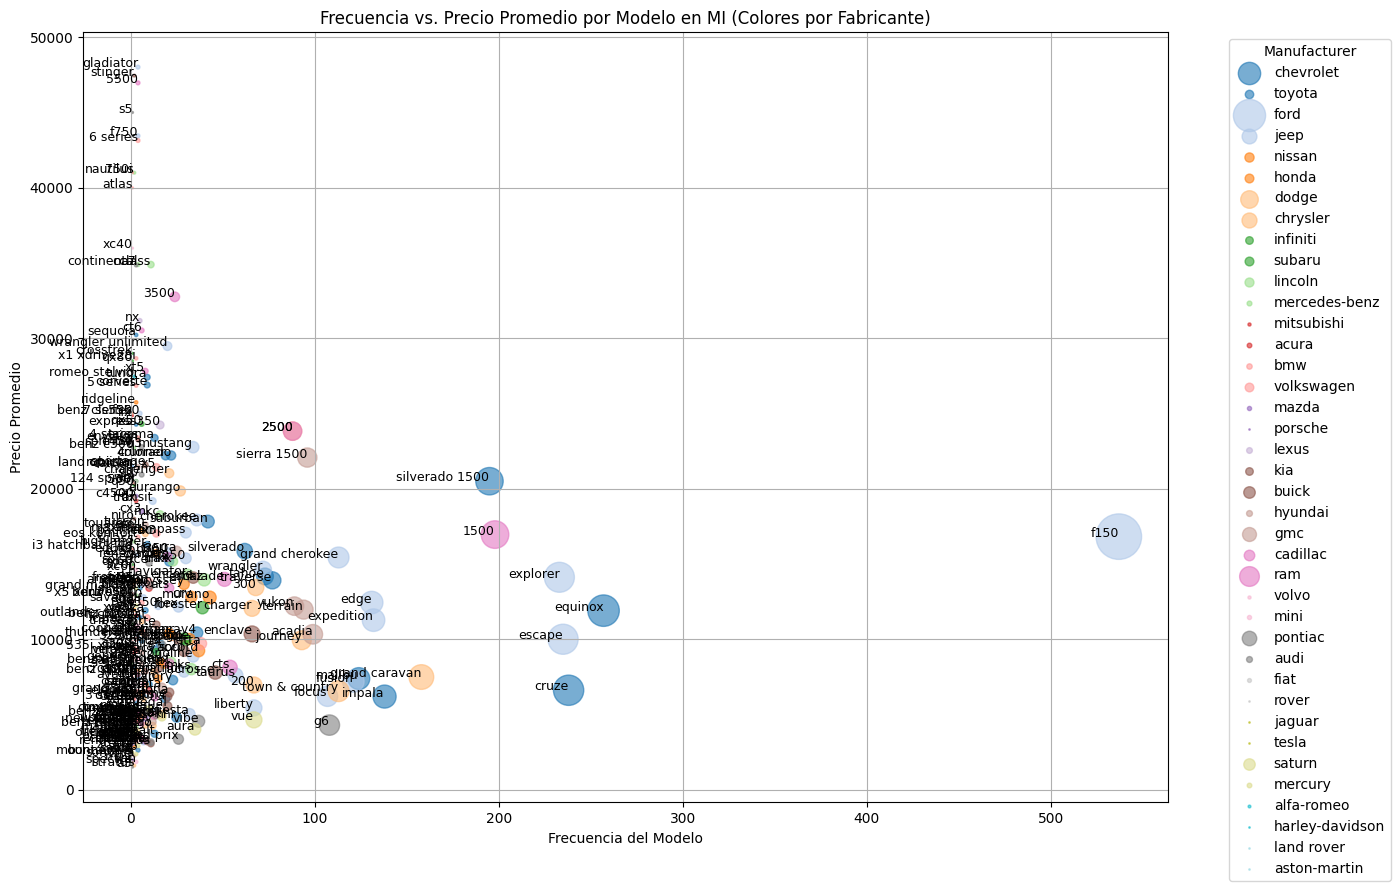

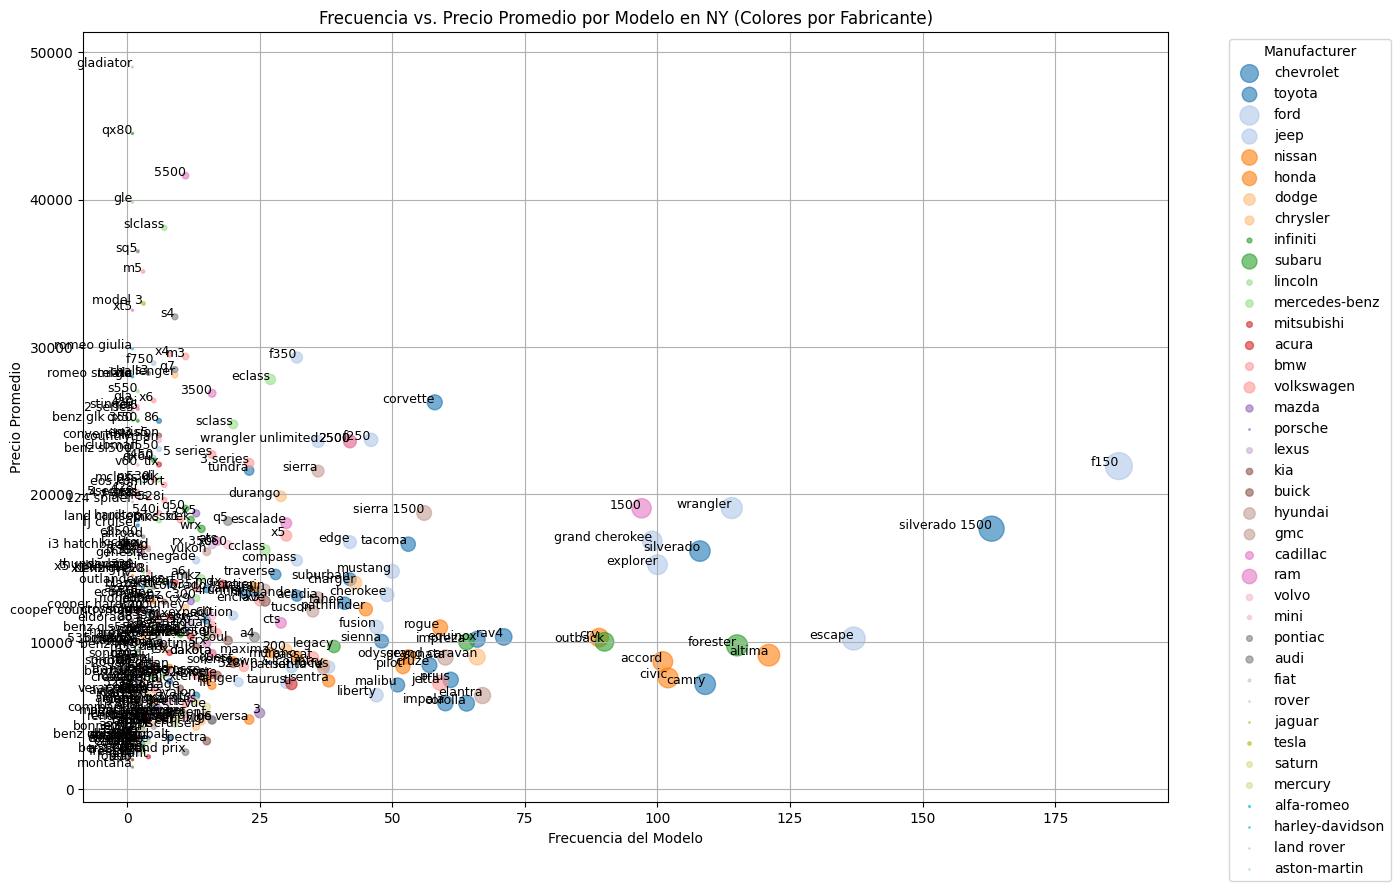

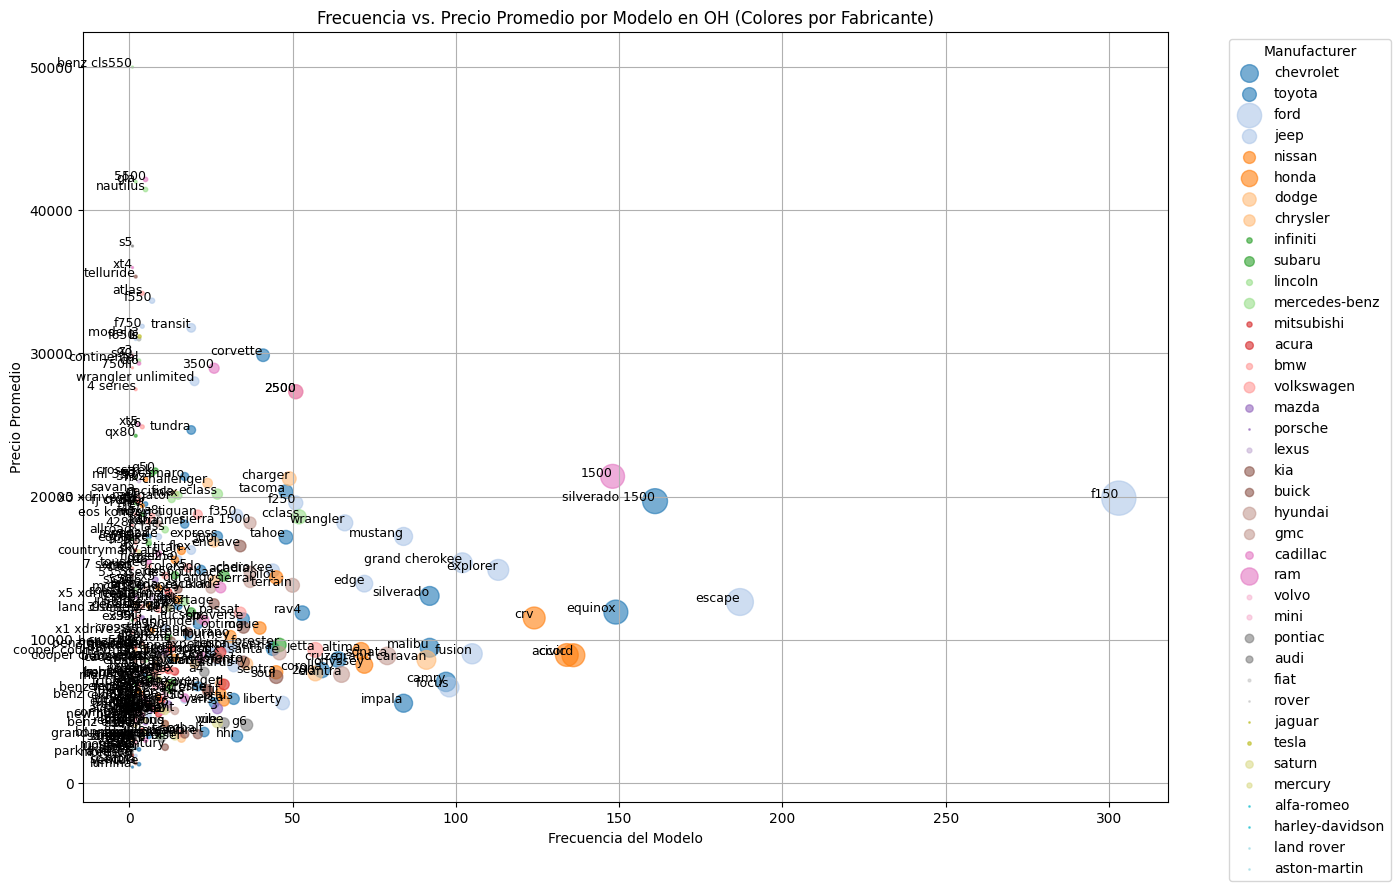

In [12]:
# Crear un mapa de colores para los fabricantes
manufacturers = vehicles_df['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Lista de estados a filtrar
states = ['ca', 'fl', 'tx', 'mi', 'ny', 'oh']

# Filtrar datos por estado y crear gráficos de burbujas
for state in states:
    state_data = vehicles_df[vehicles_df['state'] == state]
    model_stats_state = state_data.groupby('model').agg(
        avg_price=('price', 'mean'),
        count=('price', 'size')
    ).reset_index()
    model_stats_state = models_df.merge(model_stats_state, on='model')
    
    plt.figure(figsize=(14, 10))
    for manufacturer in manufacturers:
        subset = model_stats_state[model_stats_state['manufacturer'] == manufacturer]
        plt.scatter(
            subset['count'], subset['avg_price'], 
            s=subset['count']*2, alpha=0.6, 
            label=manufacturer, color=manufacturer_colors[manufacturer]
        )
    
    for i, model in enumerate(model_stats_state['model']):
        plt.text(model_stats_state['count'][i], model_stats_state['avg_price'][i], model, fontsize=9, ha='right')
    
    plt.title(f'Frecuencia vs. Precio Promedio por Modelo en {state.upper()} (Colores por Fabricante)')
    plt.xlabel('Frecuencia del Modelo')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\3008147316.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


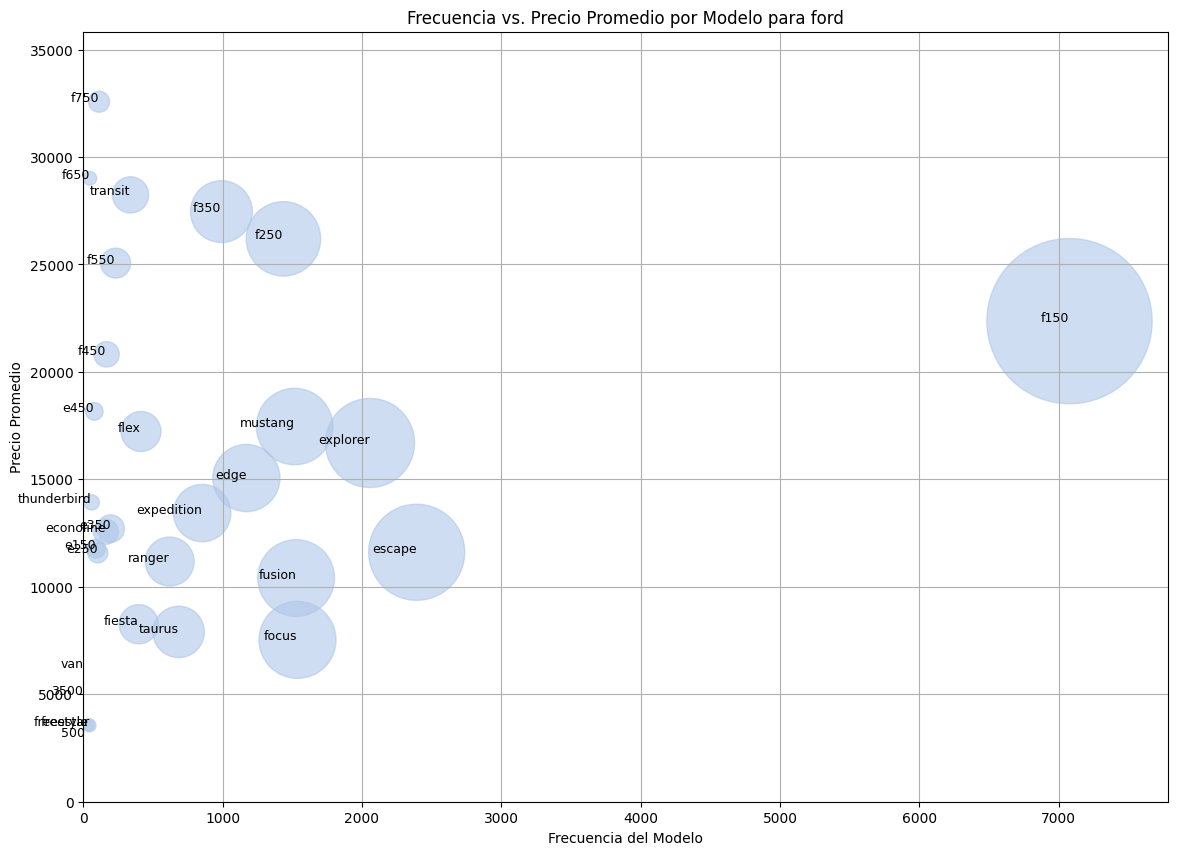

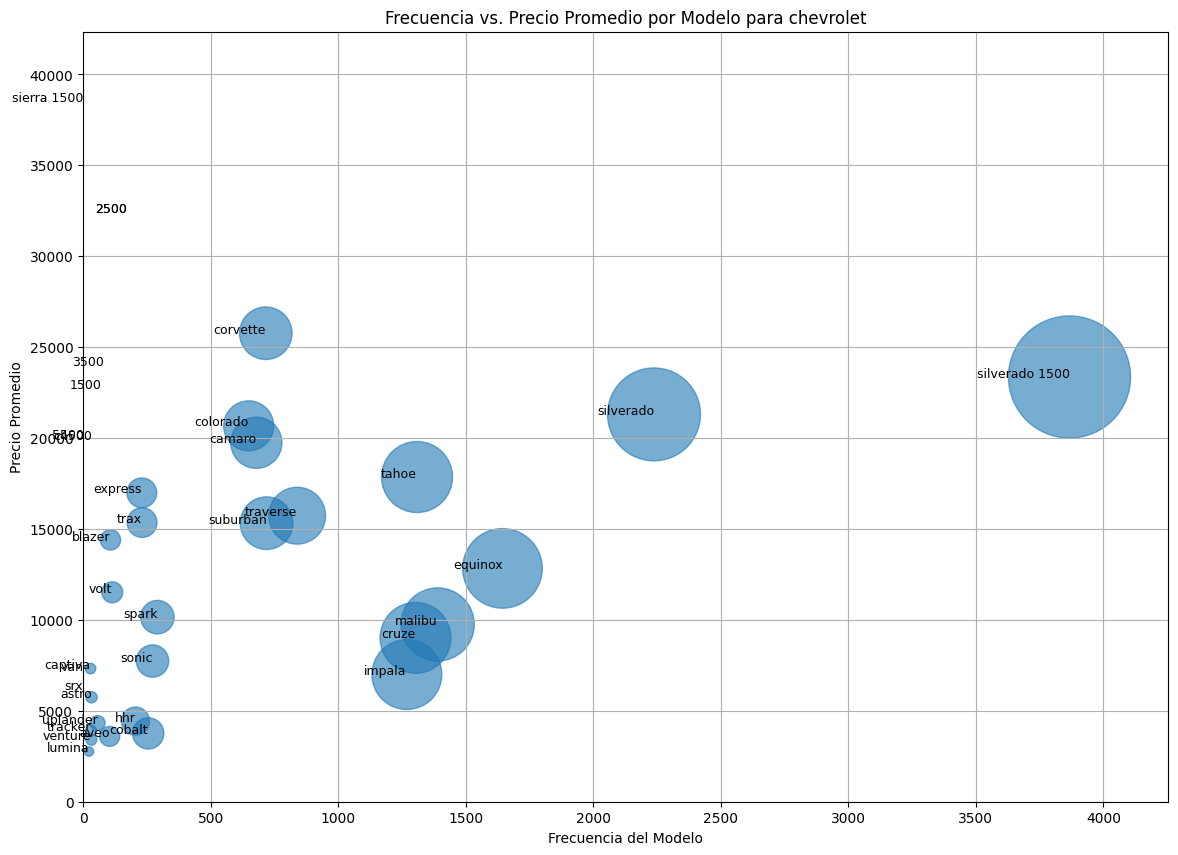

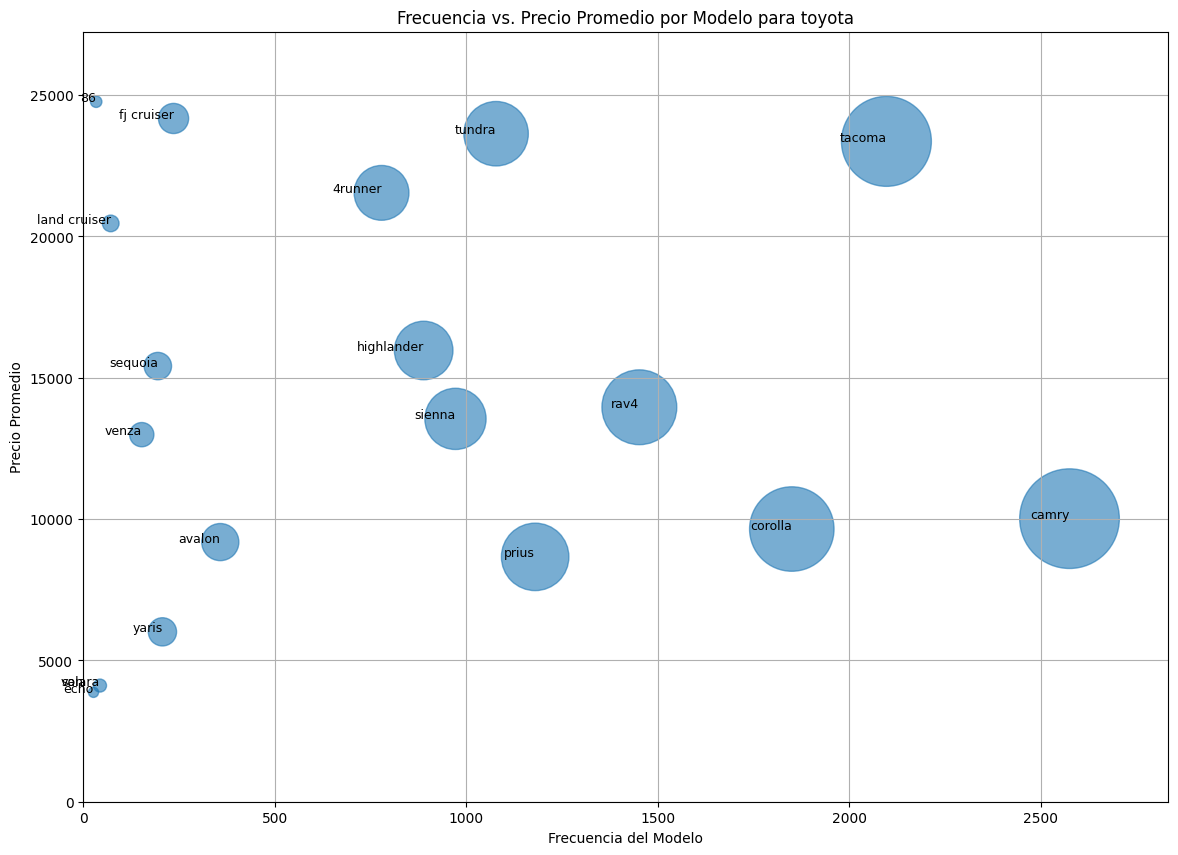

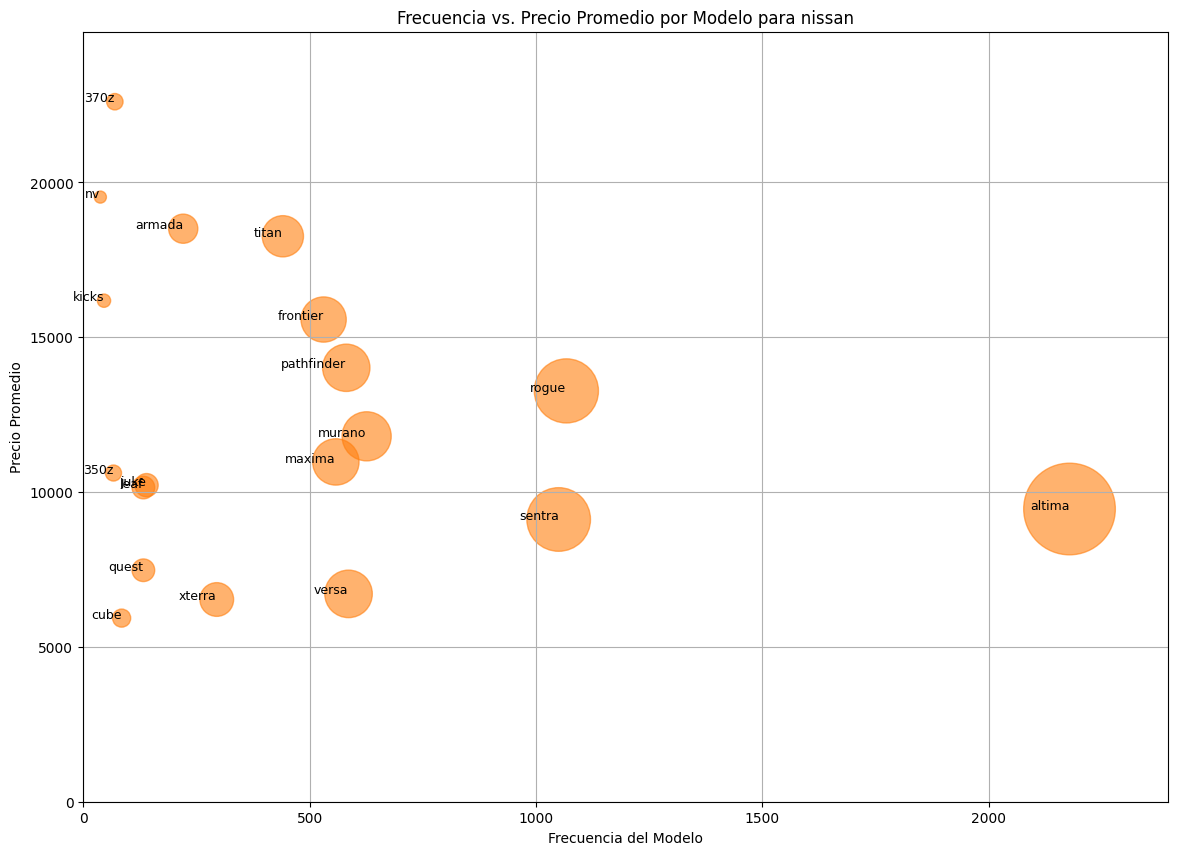

In [14]:
# Crear un mapa de colores para los fabricantes

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Lista de estados a filtrar
manufacturers = ['ford', 'chevrolet', 'toyota', 'nissan', 'honda']
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Filtrar datos por estado y crear gráficos de burbujas
for man in manufacturers:
    state_data = vehicles_df[vehicles_df['manufacturer'] == man]
    model_stats_state = state_data.groupby('model').agg(
        avg_price=('price', 'mean'),
        count=('price', 'size')
    ).reset_index()
    model_stats_state = models_df.merge(model_stats_state, on='model')
    
    plt.figure(figsize=(14, 10))
    for manufacturer in manufacturers:
        subset = model_stats_state[model_stats_state['manufacturer'] == manufacturer]
        plt.scatter(
            subset['count'], subset['avg_price'], 
            s=subset['count']*2, alpha=0.6, 
            label=manufacturer, color=manufacturer_colors[manufacturer]
        )
    
    for i, model in enumerate(model_stats_state['model']):
        plt.text(model_stats_state['count'][i], model_stats_state['avg_price'][i], model, fontsize=9, ha='right')
    
    plt.title(f'Frecuencia vs. Precio Promedio por Modelo para {man}')
    plt.xlabel('Frecuencia del Modelo')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    #plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar límites de los ejes
    plt.xlim(0, model_stats_state['count'].max() * 1.1)
    plt.ylim(0, model_stats_state['avg_price'].max() * 1.1)
    
    plt.show()



C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\1289197041.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


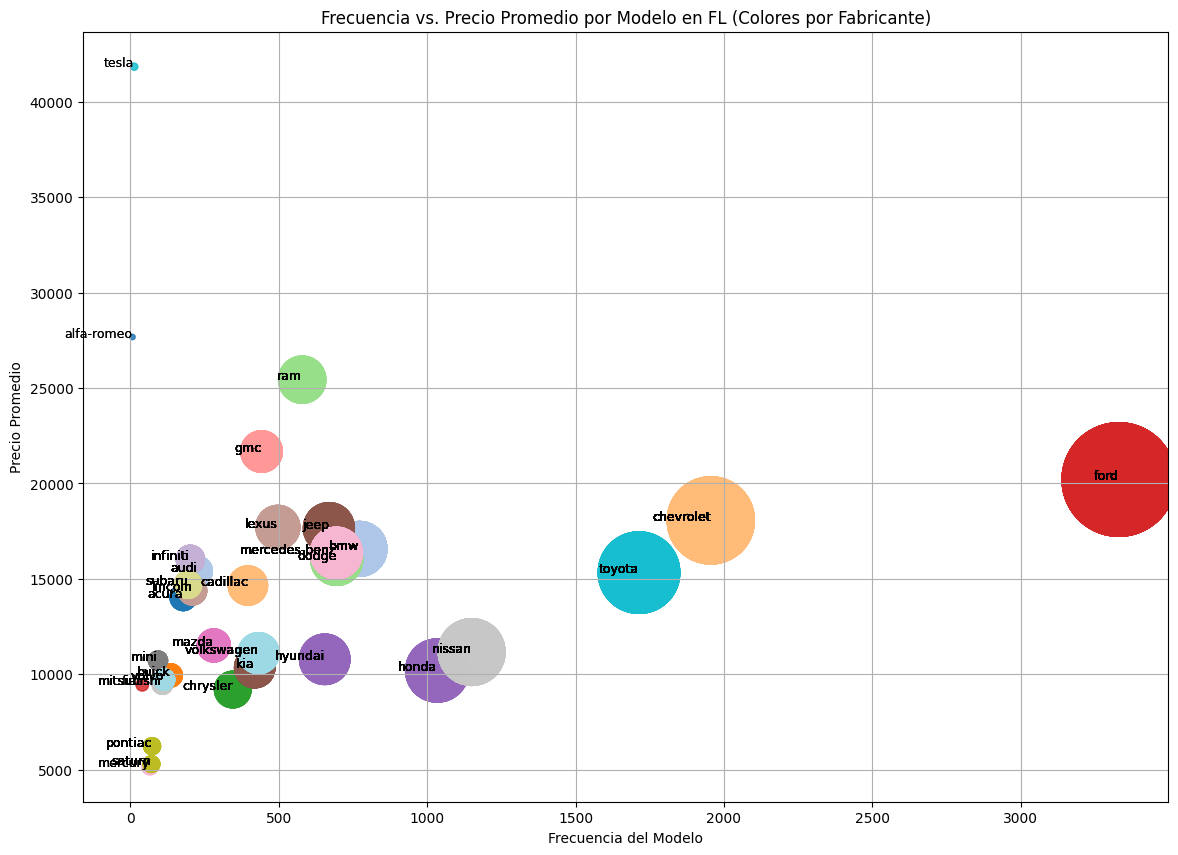

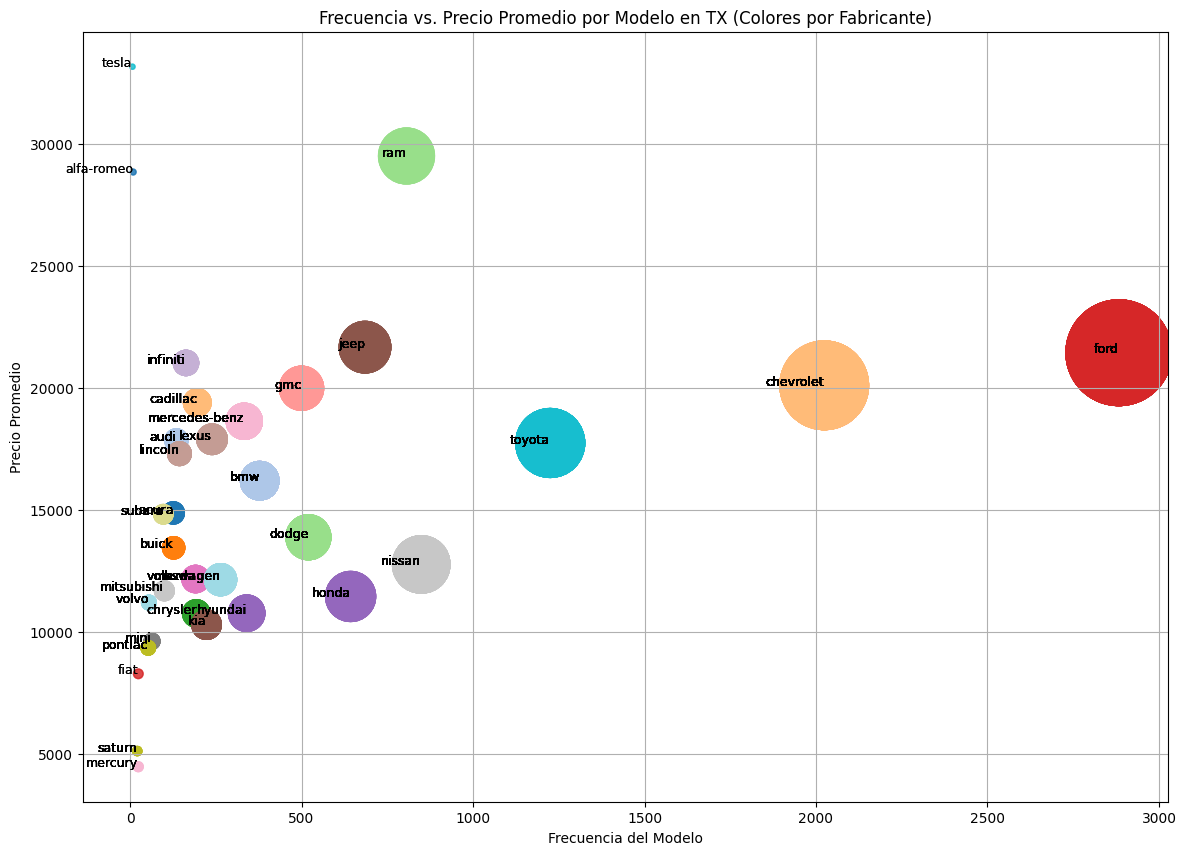

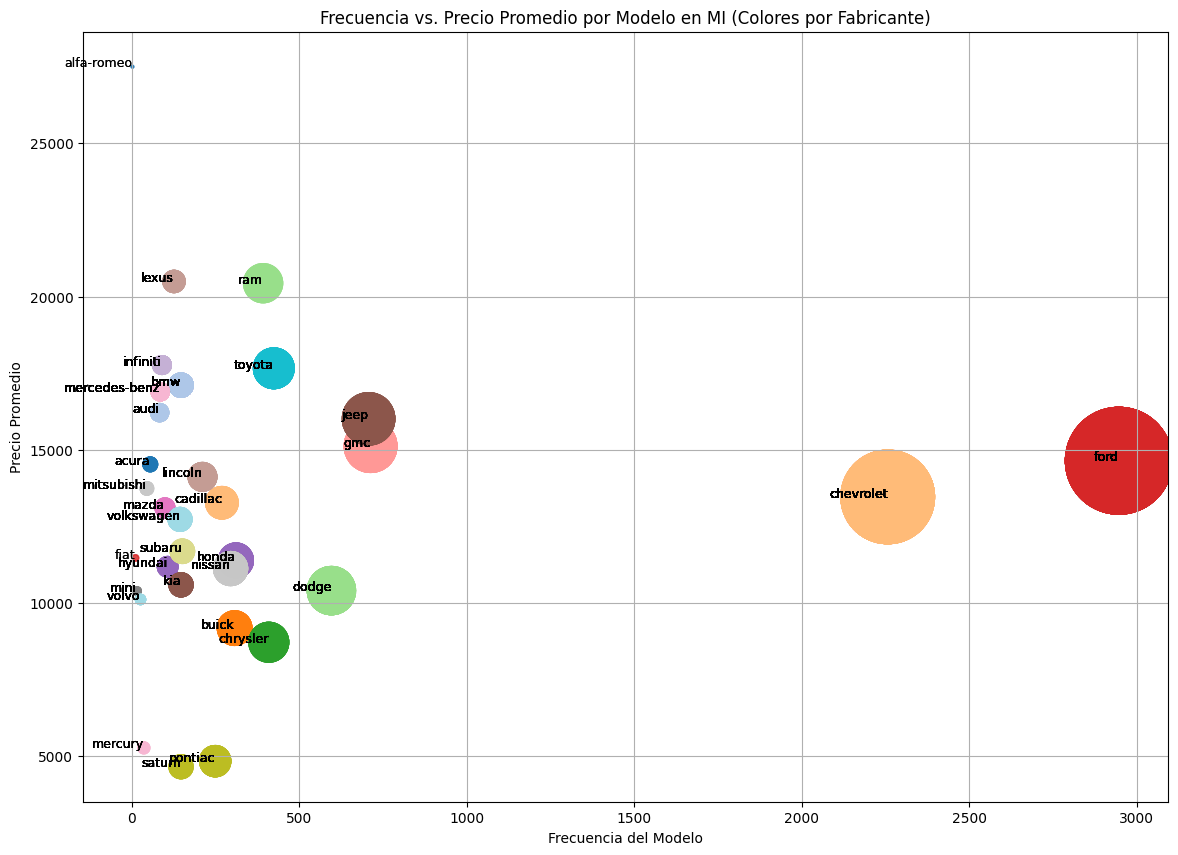

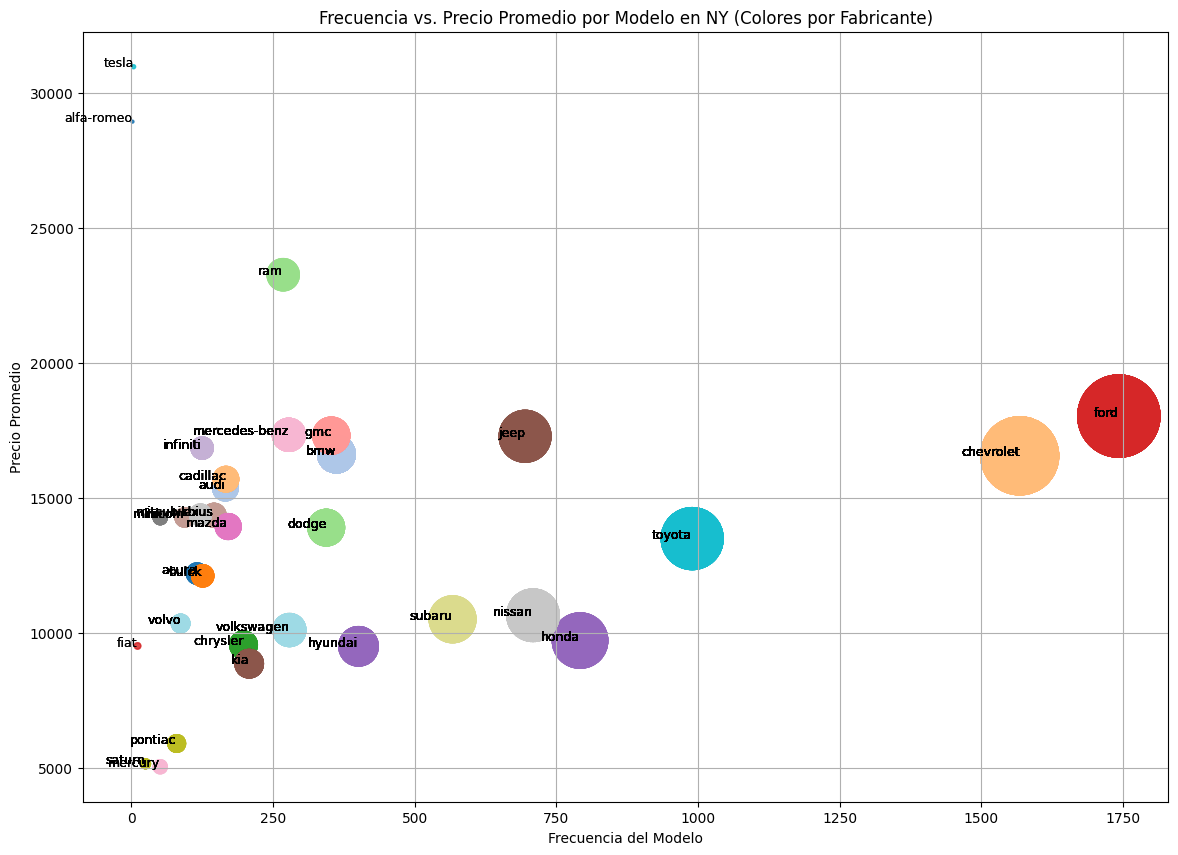

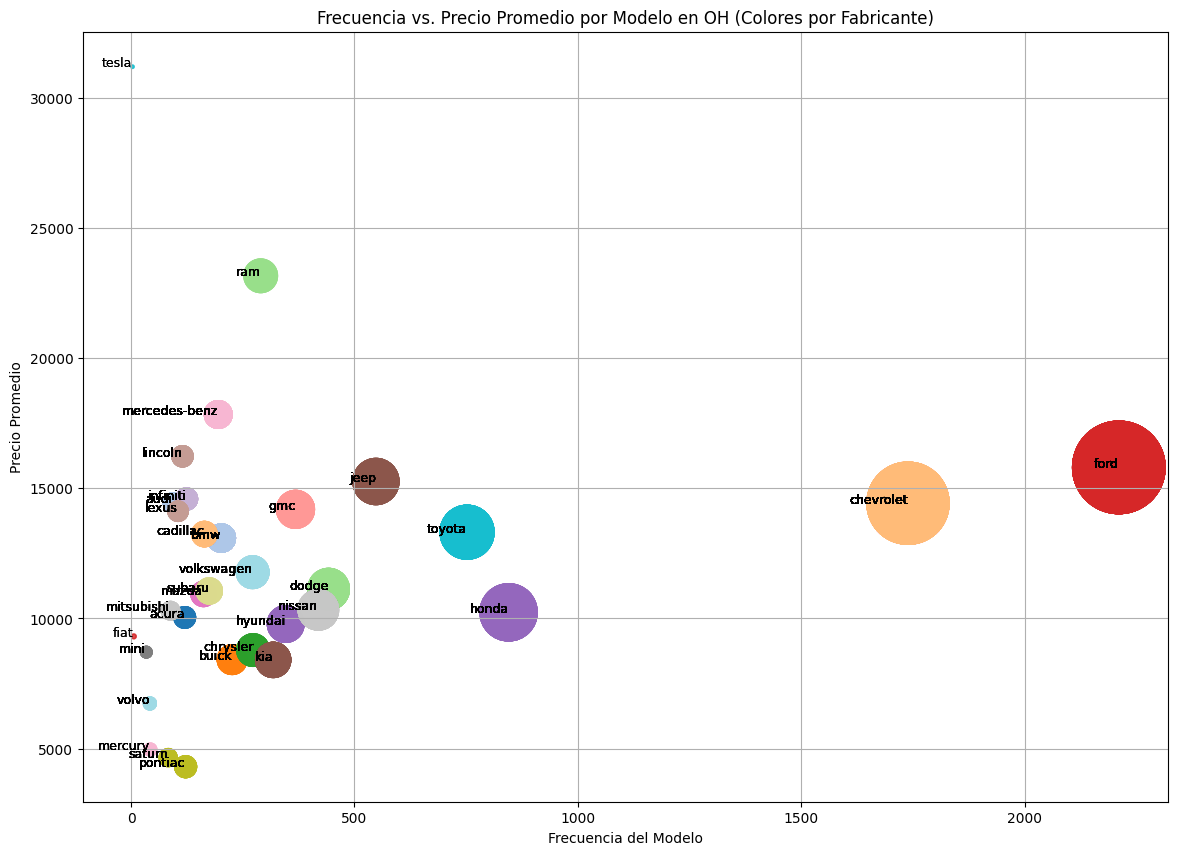

In [9]:
# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Lista de estados a filtrar
states = ['ca', 'fl', 'tx', 'mi', 'ny', 'oh']

# Filtrar datos por estado y crear gráficos de burbujas
for state in states:
    state_data = vehicles_df[vehicles_df['state'] == state]
    model_stats_state = state_data.groupby('manufacturer').agg(
        avg_price=('price', 'mean'),
        count=('price', 'size')
    ).reset_index()
    model_stats_state = models_df.merge(model_stats_state, on='manufacturer')
    
    plt.figure(figsize=(14, 10))
    for manufacturer in manufacturers:
        subset = model_stats_state[model_stats_state['manufacturer'] == manufacturer]
        plt.scatter(
            subset['count'], subset['avg_price'], 
            s=subset['count']*2, alpha=0.6, 
            label=manufacturer, color=manufacturer_colors[manufacturer]
        )
    
    for i, model in enumerate(model_stats_state['manufacturer']):
        plt.text(model_stats_state['count'][i], model_stats_state['avg_price'][i], model, fontsize=9, ha='right')
    
    plt.title(f'Frecuencia vs. Precio Promedio por Modelo en {state.upper()} (Colores por Fabricante)')
    plt.xlabel('Frecuencia del Modelo')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    #plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\735698979.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


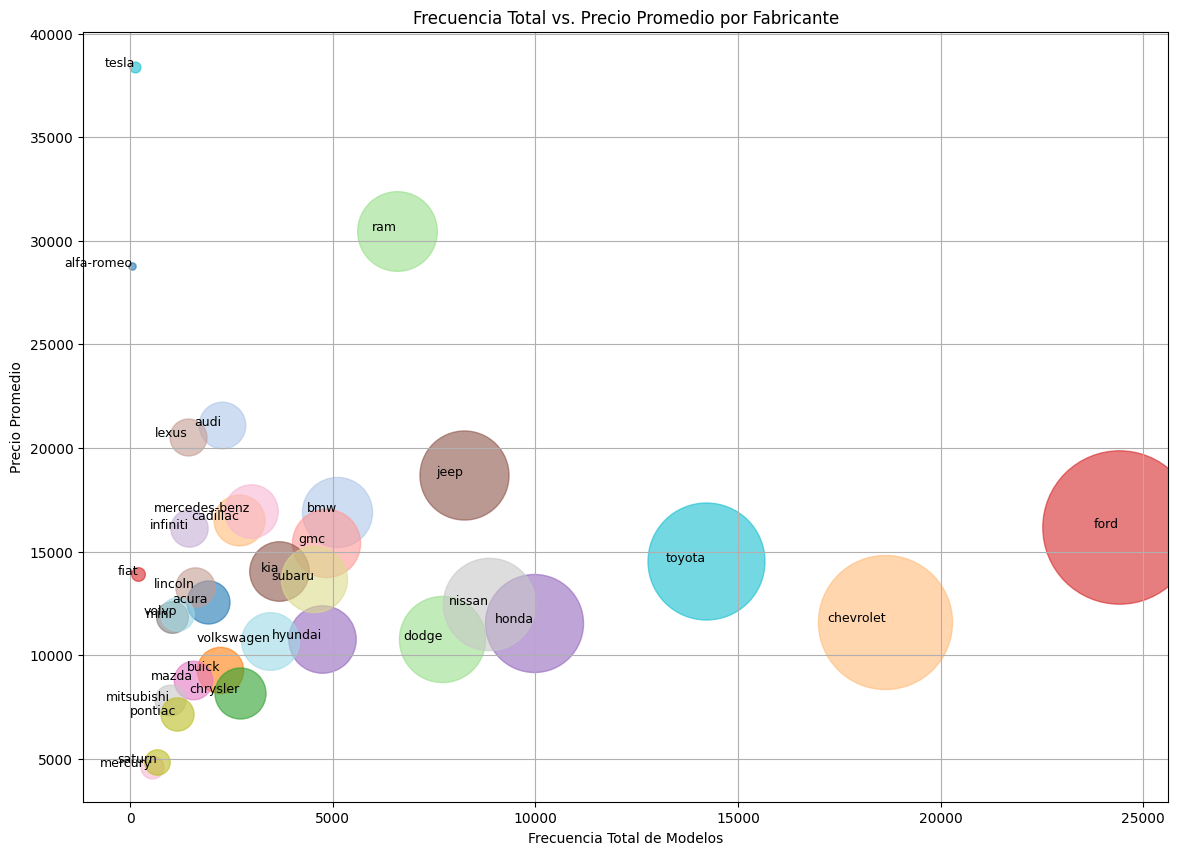

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Agrupar por fabricante para calcular el promedio de precios y la suma de frecuencias
manufacturer_stats = model_stats.groupby('manufacturer').agg(
    avg_price=('avg_price', 'mean'),
    total_count=('count', 'sum')
).reset_index()

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 10))
for manufacturer in manufacturers:
    subset = manufacturer_stats[manufacturer_stats['manufacturer'] == manufacturer]
    plt.scatter(
        subset['total_count'], subset['avg_price'], 
        s=subset['total_count']*0.5, alpha=0.6, 
        label=manufacturer, color=manufacturer_colors[manufacturer]
    )

# Añadir etiquetas a los puntos
for i, manufacturer in enumerate(manufacturer_stats['manufacturer']):
    plt.text(manufacturer_stats['total_count'][i], manufacturer_stats['avg_price'][i], manufacturer, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Frecuencia Total vs. Precio Promedio por Fabricante')
plt.xlabel('Frecuencia Total de Modelos')
plt.ylabel('Precio Promedio')
plt.grid(True)
#plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\1487160334.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sergi\AppData\Local\Temp\ipykernel_8816\1487160334.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



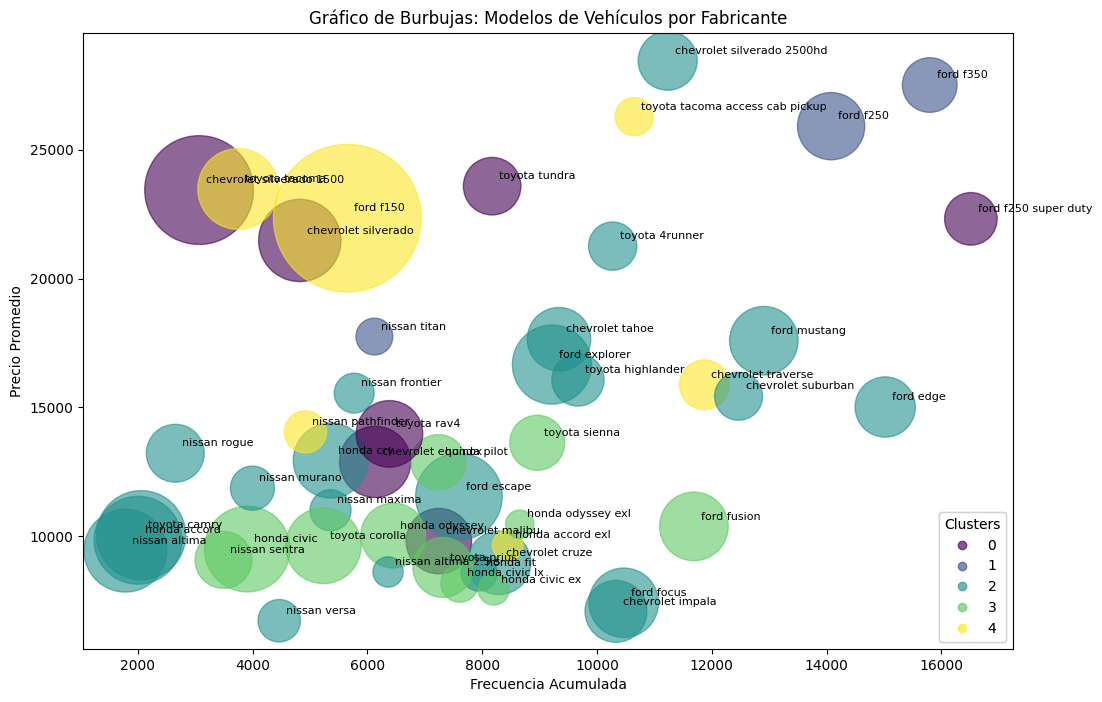

In [40]:
# cluster que considera todos los datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
df = pd.read_csv("c://users//Sergi//proyectos//proyecto_final//data//processed//archivo_cluster_KMeans_5.csv")
df = df.dropna(subset=['cluster'])

# Filtrar los fabricantes deseados
manufacturers = ['ford', 'chevrolet', 'toyota', 'nissan', 'honda']
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Calcular la frecuencia de cada modelo
df_filtered['frequency'] = df_filtered.groupby(['manufacturer', 'model'])['model'].transform('count')

# Calcular el precio promedio para cada modelo
df_filtered['avg_price'] = df_filtered.groupby(['manufacturer', 'model'])['price'].transform('mean')

# Obtener los 5 modelos más frecuentes para cada fabricante
top_models = df_filtered.groupby('manufacturer').apply(
    lambda x: x.sort_values('frequency', ascending=False).drop_duplicates(['manufacturer', 'model']).head(10)
).reset_index(drop=True)

# Calcular la frecuencia acumulada
top_models['cumulative_frequency'] = top_models.groupby('manufacturer')['frequency'].cumsum()

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))

# Usar scatter plot para tener más control sobre el tamaño de las burbujas
scatter = plt.scatter(x=top_models['cumulative_frequency'], 
                      y=top_models['avg_price'],
                      s=top_models['frequency']*2,  # Ajusta el factor de escala según sea necesario
                      c=top_models['cluster'],
                      cmap='viridis',  # Puedes cambiar el mapa de colores si lo deseas
                      alpha=0.6)

# Añadir etiquetas a las burbujas
for idx, row in top_models.iterrows():
    plt.annotate(f"{row['manufacturer']} {row['model']}", 
                 (row['cumulative_frequency'], row['avg_price']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('Gráfico de Burbujas: Modelos de Vehículos por Fabricante')
plt.xlabel('Frecuencia Acumulada')
plt.ylabel('Precio Promedio')

# Crear leyenda para los clusters
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Clusters")
plt.gca().add_artist(legend1)

# Crear leyenda para el tamaño de las burbujas
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="{x:.0f}",
          func=lambda s: s/2)  # Ajusta la función inversa según el factor de escala usado
# legend2 = plt.legend(*scatter.legend_elements(**kw),
                    #loc="lower right", title="Frecuencia")
#plt.gca().add_artist(legend2)

plt.show()



